In [1]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Widen jupyter notebook cells
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Show all columns in the head command
pd.set_option('display.max_columns', None)

In [3]:
# Load data from the csv file into a DataFrame and save in a variable
df = pd.read_csv("df_arabica_clean.csv")

In [4]:
df.head(len(df))

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,Ipanema Coffees,2240,60 kg,Brazil Specialty Coffee Association,2022 / 2023,"February 2nd, 2023",Ipanema Coffees,Mundo Novo,Completed,Natural / Dry,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,Exportadora Atlantic S.A.,300,30 kg,Asociación de Cafés Especiales de Nicaragua,2022 / 2023,"March 3rd, 2023","Exportadora Atlantic, S.A.",SHG,Completed,Natural / Dry,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C a

In [13]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [15]:
# Renaming columns
df.rename(columns={"Country of Origin": "country_origin",
                   "Farm Name": "farm_name",
                   "Lot Number": "lot_num",
                   "ICO Number": "ICO_num",
                   "Number of Bags": "num_bags",
                   "Bag Weight": "bag_weight",
                   "In-Country Partner": "in-country_partner",
                   "Harvest Year": "harvest_year",
                   "Grading Date": "grading_date",
                   "Processing Method": "processing_method",
                   "Clean Cup": "clean_cup",
                   "Total Cup Points": "total_cup_points",
                   "Moisture Percentage": "moisture_percentage",
                   "Category One Defects": "category_one_defect",
                   "Category Two Defects": "category_two_defects",
                   "Certification Body": "certification_body",
                   "Certification Address": "certification_address",
                   "Certification Contact": "certification_contact"}, inplace=True)
df.head()

,Unnamed: 0,ID,country_origin,farm_name,lot_num,Mill,ICO_num,Company,Altitude,Region,Producer,num_bags,bag_weight,in-country_partner,harvest_year,grading_date,Owner,Variety,Status,processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,clean_cup,Sweetness,Overall,Defects,total_cup_points,moisture_percentage,category_one_defect,Quakers,Color,category_two_defects,Expiration,certification_body,certification_address,certification_contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,2022-09-21,Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,80 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,Completed,Washed / Wet,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,25 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,Java,Completed,Semi Washed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2,2023-11-15,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,Japan Coffee Exchange,2022,2022-09-21,Coffee Quality Union,Gesha,Completed,Washed / Wet,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0,2023-09-21,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,24 kg,Japan Coffee Exchange,2022,2023-03-06,Coffee Quality Union,Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2024-03-05,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [6]:
# Convert the `date` column to datetime
df['Grading Date'] = pd.to_datetime(df['Grading Date'])

In [8]:
df['Expiration'] = pd.to_datetime(df['Expiration'])

In [16]:
# Informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             207 non-null    int64         
 1   ID                     207 non-null    int64         
 2   country_origin         207 non-null    object        
 3   farm_name              205 non-null    object        
 4   lot_num                206 non-null    object        
 5   Mill                   204 non-null    object        
 6   ICO_num                75 non-null     object        
 7   Company                207 non-null    object        
 8   Altitude               206 non-null    object        
 9   Region                 205 non-null    object        
 10  Producer               206 non-null    object        
 11  num_bags               207 non-null    int64         
 12  bag_weight             207 non-null    object        
 13  in-co

In [18]:
# Dealing with missing data
df.isnull().any()

Unnamed: 0               False
ID                       False
country_origin           False
farm_name                 True
lot_num                   True
Mill                      True
ICO_num                   True
Company                  False
Altitude                  True
Region                    True
Producer                  True
num_bags                 False
bag_weight               False
in-country_partner       False
harvest_year             False
grading_date             False
Owner                    False
Variety                   True
Status                   False
processing_method         True
Aroma                    False
Flavor                   False
Aftertaste               False
Acidity                  False
Body                     False
Balance                  False
Uniformity               False
clean_cup                False
Sweetness                False
Overall                  False
Defects                  False
total_cup_points         False
moisture

In [29]:
# Create a new df of just the rows that are missing data
df_null_geo = df[pd.isnull(df.processing_method)]
df_null_geo.head(len(df))

,Unnamed: 0,ID,country_origin,farm_name,lot_num,Mill,ICO_num,Company,Altitude,Region,Producer,num_bags,bag_weight,in-country_partner,harvest_year,grading_date,Owner,Variety,Status,processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,clean_cup,Sweetness,Overall,Defects,total_cup_points,moisture_percentage,category_one_defect,Quakers,Color,category_two_defects,Expiration,certification_body,certification_address,certification_contact
23,23,23,Colombia,El Diamante,CQU2023005,El Diamante,NaN,Coffee Quality Union,1350,Quindio,Farm Bedoya Arango,6,5 kg,Japan Coffee Exchange,2022,2023-04-07,Coffee Quality Union,Castillo Paraguaycito,Completed,NaN,8.08,8.00,7.83,8.17,7.75,7.83,10.0,10.0,10.0,8.00,0.0,85.67,11.3,0,0,brownish,2,2024-04-06,Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
44,44,44,Taiwan,愛姬咖啡莊園iGfarm,2021/01,愛姬咖啡莊園iGfarm,NaN,Taiwan Coffee Laboratory,150,壽豐鄉Shoufeng Township,劉孟宗 LIU MENG TSUNG,1,50 kg,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,2022-12-12,Liu Meng Tsung劉孟宗,Typica,Completed,NaN,7.92,8.00,7.92,8.00,7.58,7.75,10.0,10.0,10.0,7.83,0.0,85.00,10.9,0,0,green,0,2023-12-12,Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
51,51,51,Indonesia,PT Indo CafCo North Sumatera,016/1513/262,PT Indo CafCo,NaN,InterAmerican Coffee,1200,Aceh Tengah,PT Indo CafCo North Sumatera,320,60 kg,NKG Quality Service (a division of Bernhard Ro...,2022,2022-09-23,Charles Umeano,Catimor,Completed,NaN,7.83,7.92,7.75,7.83,7.83,7.83,10.0,10.0,10.0,7.83,0.0,84.83,11.9,0,3,bluish-green,2,2023-09-23,NKG Quality Service (a division of Bernhard Ro...,"Bahnhofstrasse 22 6300 Zug, Switzerland",Tirza Odermatt - +41 41 728 72 81
143,143,143,Taiwan,嵩岳咖啡莊園,202203,yes,non,宸嶧國際有限公司,1200,"Shibi, Gukeng Township, Yunlin County 郵遞區號 , T...",郭亮志,300,1 kg,Blossom Valley International宸嶧國際,2022,2022-10-24,郭亮志 GuoLiangZhi,Gesha,Completed,NaN,7.67,7.50,7.42,7.75,7.42,7.58,10.0,10.0,10.0,7.58,0.0,82.92,10.2,0,0,yellow-green,0,2023-10-24,Blossom Valley International宸嶧國際,No.72 Mo-Fan St. Taiwan Zip: 403,Damon Chen陳嘉峻 - +886423022323


In [ ]:
# Farm name has two missing values (index = 97, 105)
# Lot Number has one missing value (index = 105)
# Mill has three missing values (index = 74, 98, 105)
# Ico number has 132 missing values
# Altitude has one missing values (index = 105)
# Region has two missing values (index = 105, 196)
# Producer one missing value (index = 105)
# Variety has six missing values (index = 25, 97, 105, 177, 178, 194)
# Processing Method has five missing values (index = 23, 44, 51, 105, 143)

# Since the entrance with index number 105 has missing values in several columns it has been selected to be removed from further analysis

In [28]:
# Droping outlier index 105
df = df.drop([105], axis='index').copy()

In [30]:
# Checking for duplicates
df.drop_duplicates().shape

(206, 41)

In [ ]:
# There are no duplicates in this dataset

In [31]:
# Checkin country
df['country_origin'].value_counts()

Taiwan                          61
Guatemala                       21
Colombia                        18
Honduras                        13
Thailand                        12
Ethiopia                        11
Brazil                          10
Costa Rica                       8
Nicaragua                        7
El Salvador                      7
Tanzania, United Republic Of     6
United States (Hawaii)           5
Mexico                           4
Peru                             4
Vietnam                          4
Uganda                           3
Indonesia                        3
Laos                             3
Panama                           2
Kenya                            2
Madagascar                       1
Myanmar                          1
Name: country_origin, dtype: int64

In [33]:
# Checkin Variety
df['Variety'].value_counts()

Caturra                                                         27
Gesha                                                           27
Typica                                                          23
Bourbon                                                         17
Catuai                                                          12
unknown                                                         12
Catimor                                                         11
Ethiopian Heirlooms                                              9
SL34                                                             8
Mundo Novo                                                       4
SL14                                                             3
Yellow Bourbon                                                   3
SHG                                                              3
Java                                                             3
Maragogype                                                    

In [34]:
# Checkin country
df['Company'].value_counts()

Taiwan Coffee Laboratory        51
Taiwu Coffee Cooperative        25
Coffee Quality Union            15
Doi Tung Development Project     7
Peter Schoenfeld, S.A.           6
                                ..
Alo Coffee                       1
Exportadora Café California      1
Yongshun                         1
Cafe Colsuaves                   1
marubeni                         1
Name: Company, Length: 71, dtype: int64

In [36]:
# Checkin country
df['Company'].value_counts(normalize=True)

Taiwan Coffee Laboratory        0.247573
Taiwu Coffee Cooperative        0.121359
Coffee Quality Union            0.072816
Doi Tung Development Project    0.033981
Peter Schoenfeld, S.A.          0.029126
                                  ...   
Alo Coffee                      0.004854
Exportadora Café California     0.004854
Yongshun                        0.004854
Cafe Colsuaves                  0.004854
marubeni                        0.004854
Name: Company, Length: 71, dtype: float64

Text(0, 0.5, '')

C:\Users\rafas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23480 (\N{CJK UNIFIED IDEOGRAPH-5BB8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rafas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23975 (\N{CJK UNIFIED IDEOGRAPH-5DA7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rafas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22283 (\N{CJK UNIFIED IDEOGRAPH-570B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rafas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rafas\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_

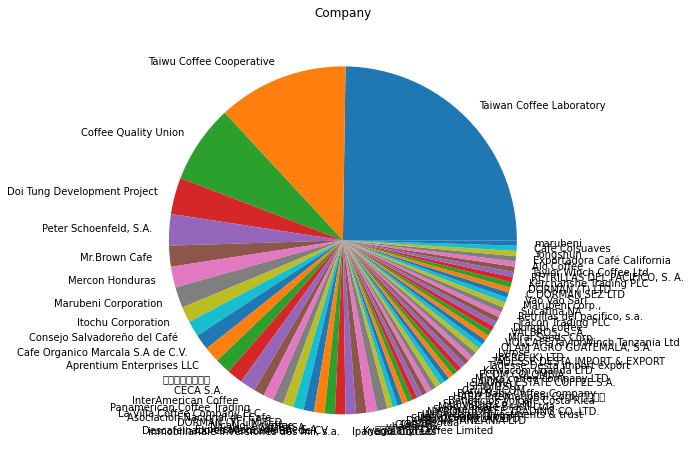

In [35]:
plt.figure(figsize=(12,8));

services = df['Company'].value_counts()
services.plot(kind='pie')

plt.title('Company')
plt.ylabel("")